# Dataset Selection(Step 1: Select a real-world dataset)

the World Bank Group with 189 member countries, staff from more than 170 countries, and offices in over 130 locations, is a unique global partnership, working for sustainable solutions that reduce poverty and build shared prosperity in developing countries.
It is also one of the world’s largest sources of funding and knowledge for developing countries.

the WORLD DEVELOPMENT INDICATORS (WDI) dataset which contains collections of time series data on a variety of topics, has been choosed for final project.

This dataset contains the most current and accurate global development data available including national, regional and global estimates. Data has been collected from the early 1960’s to present and is updated regularly depending on new data available on the indicators. This time series data offers indicators such as agriculture and food security, climate change, population growth, economic growth, education, energy, natural Resources and many more.

# Step 2: Perform data preparation & cleaning


* Handle missing, incorrect and invalid data
* Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

* **Load the dataset into a data frame using Pandas**

In [1]:
#!wget http://databank.worldbank.org/data/download/WDI_csv.zip
#!unzip WDI_csv.zip

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset into a data frame using Pandas
data_df = pd.read_csv("WDIData.csv")


* **Explore the number of rows & columns, ranges of values etc.**

In [3]:
data_df.shape

(380160, 66)

In [4]:
data_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [5]:
print(data_df['Country Name'].unique().shape)

(264,)


In [6]:
print(len(data_df['Indicator Name'].unique())) # Number of unique indicator names evaluated on this dataset

1440


The database contains 1,600 time series indicators for 217 economies and more than 40 country groups, with data for many indicators going back more than 50 years.

the dataset thems include following topics:


*   Poverty and Inequality (poverty, prosperity, consumption, income distribution,etc.)
*   People(population dynamics, education, labor, health, gender, etc.)
*   Environment(agriculture, climate change, energy, biodiversity, water, sanitation, etc.)
*   Economy(growth, economic structure, income and savings, trade, labor productivity, etc.)
*   States and Market(business, stock markets, military, communications, transport, technology,etc.)
*   Global Links(debt, trade, aid dependency, refugee, tourism, migration, etc.)



Since there are too many indicators for each country during from 1960 to 2020, we will consider three step for to filter data:

1.   Filter years when we do not have data related to those years
2.   Choose desired indicators from different dataset thems
3.   Choose desired countries

regarding to these three steps we filter our raw dataframe and compose desired dataframe.

In [7]:
period_1960_1980 = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
              '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
              '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
              '1978', '1979']

period_1980_2000 = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
              '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', 
              '1989', '1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', 
              '1998', '1999']

period_2000_2020 = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
              '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', 
               '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 
               '2016', '2017', '2018', '2019', '2020']

**What is the percentage of NA values for all the records in periods of 1960-1980, 1980-2000 and 2000-2020**

In [8]:
print((data_df.loc[:,period_1960_1980].isna().sum()/data_df.loc[:,period_1960_1980].shape[0]) * 100)

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
1960              90.100747
1961              88.946233
1962              88.362269
1963              88.393308
1964              88.245476
1965              87.583386
1966              87.659407
1967              87.201178
1968              87.308239
1969              86.806608
1970              81.943129
1971              80.234375
1972              79.479693
1973              79.583596
1974              79.187447
1975              78.086069
1976              77.505524
1977              76.519097
1978              76.584596
1979              76.355219
dtype: float64


In [9]:
print((data_df.loc[:,period_1980_2000].isna().sum()/data_df.loc[:,period_1980_2000].shape[0]) * 100)

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
1980              75.082597
1981              74.541772
1982              74.177715
1983              74.226641
1984              74.016730
1985              73.652146
1986              73.459333
1987              73.141046
1988              73.231534
1989              72.772517
1990              66.454914
1991              64.648043
1992              63.565867
1993              63.243371
1994              62.645465
1995              60.549505
1996              60.642624
1997              60.310396
1998              59.784827
1999              58.360690
dtype: float64


In [10]:
print((data_df.loc[:,period_2000_2020].isna().sum()/data_df.loc[:,period_2000_2020].shape[0]) * 100)

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
2000              52.037037
2001              54.144308
2002              52.881681
2003              52.703335
2004              51.298664
2005              47.950074
2006              48.300189
2007              47.270097
2008              47.434764
2009              47.421612
2010              43.282828
2011              45.716277
2012              44.986585
2013              46.284196
2014              44.476273
2015              45.591593
2016              45.410354
2017              49.563868
2018              54.498106
2019              71.418613
2020              96.311553
dtype: float64


From reviewing dataseries we choose to analysis records between 2000-2019, since there are much less NA values for records

In [11]:
# Explaning which columns are more interested and why
# After Berlin Wall fall and Soviet Union dissolved
subset_years = ['2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']

desired_columns = ['Country Name', 'Indicator Name','2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

subset_df = data_df.dropna(axis=0, how='all', subset=subset_years) # rows which all years (from 1992 to 2019) are Null would be dropped from the dataset
subset_df = subset_df[desired_columns] # we filter desired column

**Lets choose the desired and most important Indicators for our case study**

there are 1440 unique indicators for almost about 217 economies and countries.


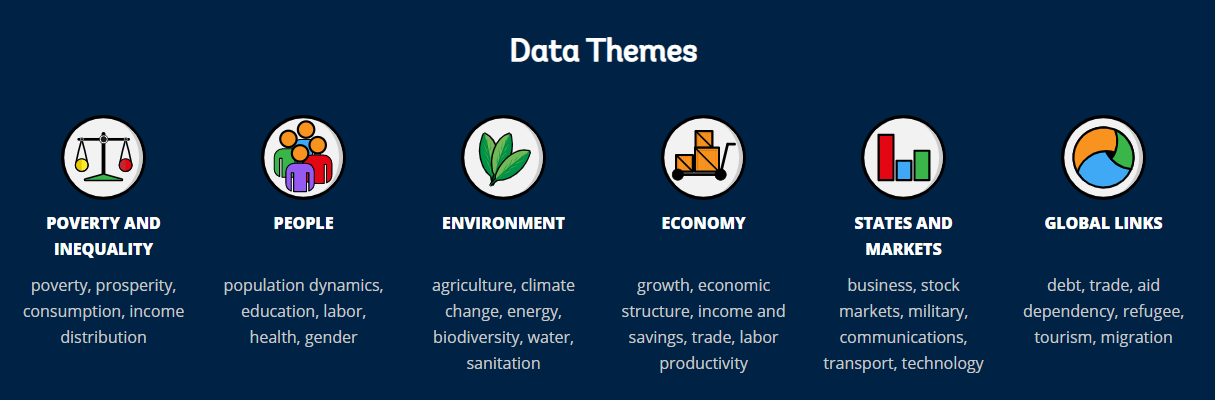

In [12]:
subset_df['Indicator Name'].unique().shape # number of parameteres gathered in this dataset file

(1440,)

Among the all indicators we are going to analysis selected countries based on the bellow indicators in different themes: 

**Poverty and Inequality**

* `Multidimensional poverty headcount ratio (% of total population)`

**People**

* `Current education expenditure, total (% of total expenditure in public institutions)`
* `Government expenditure on education, total (% of GDP)`
* `Unemployment, total (% of total labor force) (national estimate)`
* `Employers, total (% of total employment) (modeled ILO estimate)`
* `Employment in agriculture (% of total employment) (modeled ILO estimate)`
* `Employment in industry (% of total employment) (modeled ILO estimate)`
* `Employment in services (% of total employment) (modeled ILO estimate)`
* `Self-employed, total (% of total employment) (modeled ILO estimate)`
* `Share of youth not in education, employment or training, total (% of youth population)`
* `Labor force with advanced education (% of total working-age population with advanced education)`
* `Labor force with intermediate education (% of total working-age population with intermediate education)`
* `Labor force with basic education (% of total working-age population with basic education)`
* `Current health expenditure (% of GDP)`
* `Births attended by skilled health staff (% of total)`
* `Domestic general government health expenditure (% of current health expenditure)`
* `Domestic private health expenditure (% of current health expenditure)`
* `Community health workers (per 1,000 people)`
* `Life expectancy at birth, total (years)`
* `Fertility rate, total (births per woman)`
* `Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)`



**Environment**
* `PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)`

**Economy, States and Market and Global Links**

* `Domestic credit to private sector (% of GDP)`
* `Foreign direct investment, net inflows (% of GDP)`
* `Foreign direct investment, net outflows (% of GDP)`               
* `Agriculture, forestry, and fishing, value added (% of GDP)`
* `Industry (including construction), value added (% of GDP)`
* `Manufacturing, value added (% of GDP)`
* `Services, value added (% of GDP)`
* `Expense (% of GDP)`

In [13]:
targeted_indicators = [
               'Current health expenditure (% of GDP)', #*
               'Births attended by skilled health staff (% of total)', #*
               'Domestic general government health expenditure (% of current health expenditure)', #*
               'Domestic private health expenditure (% of current health expenditure)', #*
               'Community health workers (per 1,000 people)', #*
               'Life expectancy at birth, total (years)', #*


               'Current education expenditure, total (% of total expenditure in public institutions)', #* # not in index of New Zealand
               'Government expenditure on education, total (% of GDP)', #*
              
               'Employers, total (% of total employment) (modeled ILO estimate)', #*
               'Employment in agriculture (% of total employment) (modeled ILO estimate)', #*
               'Employment in industry (% of total employment) (modeled ILO estimate)', #*
               'Employment in services (% of total employment) (modeled ILO estimate)', #*
               
               'Labor force with advanced education (% of total working-age population with advanced education)', #*
               'Labor force with basic education (% of total working-age population with basic education)', #*  not in index of New Zealand
               'Labor force with intermediate education (% of total working-age population with intermediate education)', #*
               
               'Self-employed, total (% of total employment) (modeled ILO estimate)', #*

               'Share of youth not in education, employment or training, total (% of youth population)', #*
               
               'Domestic credit to private sector (% of GDP)', #*
               #'Central government debt, total (% of GDP)',           # not in index of Argentina, France, Canada
               'Foreign direct investment, net inflows (% of GDP)', #*
               'Foreign direct investment, net outflows (% of GDP)', #*
               
               'Agriculture, forestry, and fishing, value added (% of GDP)', #*
               'Industry (including construction), value added (% of GDP)', #*
               'Manufacturing, value added (% of GDP)', #*
               'Services, value added (% of GDP)', #*
               'Expense (% of GDP)', #*

               'Fertility rate, total (births per woman)', #*
               'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)', #*
               'Multidimensional poverty headcount ratio (% of total population)', #*
               'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'
               ]

the analysis conducted on the bellow countries which are from different continent and the are also blong to developed and developing countries.

In [14]:
targeted_countries = ['Brazil', 'Argentina', 'Spain', 'Germany', 'France', 'Turkey', 'Canada', 'United States', 'New Zealand', 'Australia']

grouped_by_name = data_df.groupby('Country Name')
df2 = pd.concat([grouped_by_name.get_group(name) for name in targeted_countries])
grouped_by_indicators = df2.groupby('Indicator Name')
df3 = pd.concat([grouped_by_indicators.get_group(name) for name in targeted_indicators])

prepared_df = df3[desired_columns]
prepared_df.to_csv("data.csv")

We will devide our original dataframe into 10 dataframe, one for each country with desired indicators

In [15]:
brazil_df = prepared_df.groupby('Country Name').get_group('Brazil') 
argentina_df = prepared_df.groupby('Country Name').get_group('Argentina')
spain_df = prepared_df.groupby('Country Name').get_group('Spain')
german_df = prepared_df.groupby('Country Name').get_group('Germany') 
france_df = prepared_df.groupby('Country Name').get_group('France') 
turkey_df = prepared_df.groupby('Country Name').get_group('Turkey')
canada_df = prepared_df.groupby('Country Name').get_group('Canada')
us_df = prepared_df.groupby('Country Name').get_group('United States') 
australia_df = prepared_df.groupby('Country Name').get_group('Australia')

with this function we transpose countries dataframe in form that coulumns would be indicators and each row is the year and values recorded for that year

In [16]:
def target_df_fn(df,targeted_indicators):
  df_t = df.T
  df_new = df_t.iloc[2:]
  df_new.columns = df_t.iloc[1]
  df_targeted = df_new[targeted_indicators]

  return df_targeted

In [17]:
brazil_target_df = target_df_fn(brazil_df,targeted_indicators)
argentina_target_df = target_df_fn(argentina_df,targeted_indicators)
spain_target_df = target_df_fn(spain_df,targeted_indicators)
german_target_df = target_df_fn(german_df,targeted_indicators)
france_target_df = target_df_fn(france_df,targeted_indicators)
turkey_target_df = target_df_fn(turkey_df,targeted_indicators)
canada_target_df = target_df_fn(canada_df,targeted_indicators)
us_target_df = target_df_fn(us_df,targeted_indicators)
australia_target_df = target_df_fn(australia_df,targeted_indicators)

For example you can see `Current health expenditure (% of GDP)` data information for australia

In [18]:
print(australia_target_df['Current health expenditure (% of GDP)'])

2000    7.61387
2001    7.69631
2002    7.89326
2003    7.90441
2004    8.10959
2005    7.99012
2006    7.98938
2007    8.06758
2008     8.2558
2009    8.56322
2010    8.43084
2011    8.54152
2012     8.6757
2013    8.75856
2014    9.03803
2015    9.31474
2016    9.19608
2017    9.20595
2018        NaN
2019        NaN
Name: Current health expenditure (% of GDP), dtype: object


We can also check information for desired indicators for Australia for 2000.

In [19]:
australia_target_df.iloc[0,:]

Indicator Name
Current health expenditure (% of GDP)                                                                         7.61387
Births attended by skilled health staff (% of total)                                                             99.3
Domestic general government health expenditure (% of current health expenditure)                              68.3793
Domestic private health expenditure (% of current health expenditure)                                         31.6207
Community health workers (per 1,000 people)                                                                       NaN
Life expectancy at birth, total (years)                                                                       79.2341
Current education expenditure, total (% of total expenditure in public institutions)                          92.9892
Government expenditure on education, total (% of GDP)                                                         4.89147
Employers, total (% of total employment) 

From the above information we will noticed that there are `NaN` values for some indicators in some years for all countries that we have to manage them.

Bellow we demostrate the status of `NaN` values for all th data we have

In [20]:
accom_df = pd.DataFrame(index=targeted_indicators)
accom_df.loc[:,'Brazil'] = brazil_target_df.isna().sum().values
accom_df.loc[:,'Argentina'] = argentina_target_df.isna().sum().values
accom_df.loc[:,'Spain'] = spain_target_df.isna().sum().values
accom_df.loc[:,'German'] = german_target_df.isna().sum().values
accom_df.loc[:,'France'] = france_target_df.isna().sum().values
accom_df.loc[:,'Turkey'] = turkey_target_df.isna().sum().values
accom_df.loc[:,'Canada'] = canada_target_df.isna().sum().values
accom_df.loc[:,'United States'] = us_target_df.isna().sum().values
accom_df.loc[:,'Australia'] = australia_target_df.isna().sum().values

accom_df = accom_df.T

We plot the information to have better undestanding

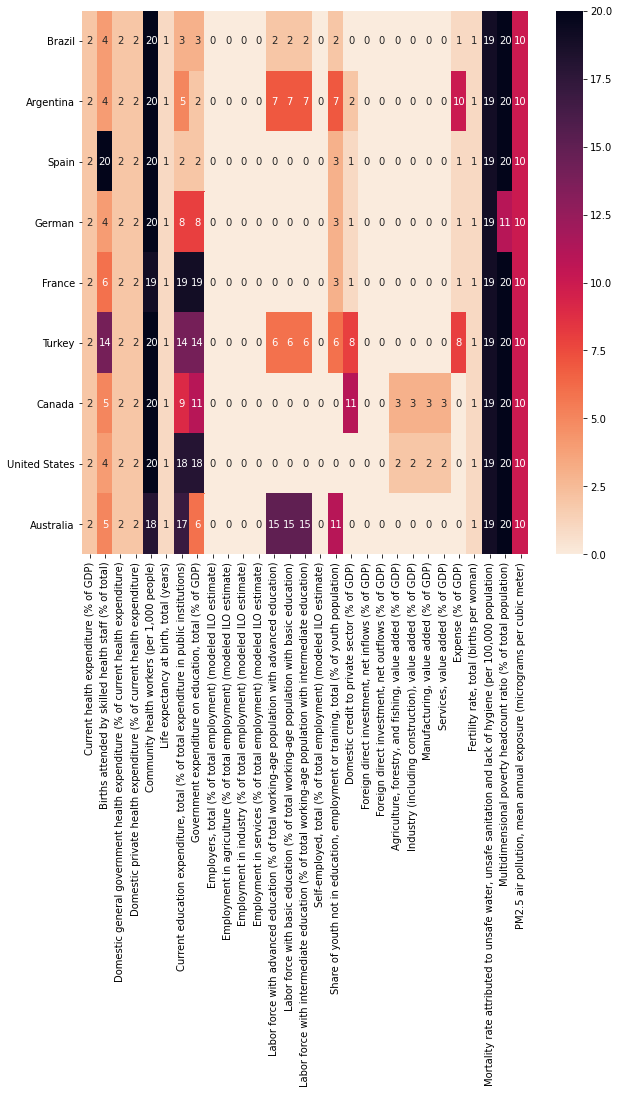

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(accom_df, annot=True, cmap=sns.cm.rocket_r)

**Filling NaN values with mean values**

In [22]:
# Replace NaN values with mean values or try method = 'backfill', 'bfill', 'pad', 'ffill'
brazil_trgt_na_df = brazil_target_df.fillna(brazil_target_df.mean()).astype(float).applymap('{:,.2f}'.format)
argentina_trgt_na_df = argentina_target_df.fillna(argentina_target_df.mean()).astype(float).applymap('{:,.2f}'.format)
spain_trgt_na_df = spain_target_df.fillna(spain_target_df.mean()).astype(float).applymap('{:,.2f}'.format)
german_trgt_na_df = german_target_df.fillna(german_target_df.mean()).astype(float).applymap('{:,.2f}'.format)
france_trgt_na_df = france_target_df.fillna(france_target_df.mean()).astype(float).applymap('{:,.2f}'.format)
turkey_trgt_na_df = turkey_target_df.fillna(turkey_target_df.mean()).astype(float).applymap('{:,.2f}'.format)
canada_trgt_na_df = canada_target_df.fillna(canada_target_df.mean()).astype(float).applymap('{:,.2f}'.format)
us_trgt_na_df = us_target_df.fillna(us_target_df.mean()).astype(float).applymap('{:,.2f}'.format)
australia_trgt_na_df = australia_target_df.fillna(australia_target_df.mean()).astype(float).applymap('{:,.2f}'.format)

# Step 3: Perform exploratory analysis & visualization

* Compute the mean, sum, range and other interesting statistics for numeric columns
* Explore distributions of numeric columns using histograms etc.
* Explore relationship between columns using scatter plots, bar charts etc.
* Make a note of interesting insights from the exploratory analysis

# Brazil

In [23]:
brazil_trgt_na_df.describe()

Indicator Name,Current health expenditure (% of GDP),Births attended by skilled health staff (% of total),Domestic general government health expenditure (% of current health expenditure),Domestic private health expenditure (% of current health expenditure),"Community health workers (per 1,000 people)","Life expectancy at birth, total (years)","Current education expenditure, total (% of total expenditure in public institutions)","Government expenditure on education, total (% of GDP)","Employers, total (% of total employment) (modeled ILO estimate)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Labor force with advanced education (% of total working-age population with advanced education),Labor force with basic education (% of total working-age population with basic education),Labor force with intermediate education (% of total working-age population with intermediate education),"Self-employed, total (% of total employment) (modeled ILO estimate)","Share of youth not in education, employment or training, total (% of youth population)",Domestic credit to private sector (% of GDP),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net outflows (% of GDP)","Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Manufacturing, value added (% of GDP)","Services, value added (% of GDP)",Expense (% of GDP),"Fertility rate, total (births per woman)","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)",Multidimensional poverty headcount ratio (% of total population),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"
count,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
unique,18,11,19,17,1,20,16,18,18,20,20,20,16,19,19,20,19,20,19,19,19,20,20,20,20,18,1,1,10
top,8.40,98.66,43.04,56.78,nan,70.12,93.76,5.20,4.38,16.48,22.31,61.42,83.92,62.02,78.06,33.55,20.48,27.69,4.15,-0.27,4.42,21.22,12.36,56.80,27.31,1.76,1.00,nan,14.61
freq,2,4,2,2,20,1,4,3,2,1,1,1,3,2,2,1,2,1,2,2,2,1,1,1,1,2,20,20,11


In [24]:
brazil_trgt_na_df.columns

Index(['Current health expenditure (% of GDP)',
       'Births attended by skilled health staff (% of total)',
       'Domestic general government health expenditure (% of current health expenditure)',
       'Domestic private health expenditure (% of current health expenditure)',
       'Community health workers (per 1,000 people)',
       'Life expectancy at birth, total (years)',
       'Current education expenditure, total (% of total expenditure in public institutions)',
       'Government expenditure on education, total (% of GDP)',
       'Employers, total (% of total employment) (modeled ILO estimate)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       'Labor force with advanced education (% of total working-age population with advanced education)',
       'Labor force with basic e

In [25]:
def line_plotter(indicator):
  fig=plt.figure(figsize=(15,5))
  ax=fig.add_subplot(111)
  ax.plot(brazil_trgt_na_df.index,brazil_trgt_na_df['{}'.format(indicator)],label='Brazil')
  ax.plot(spain_trgt_na_df.index,spain_trgt_na_df['{}'.format(indicator)],label='Spain')
  ax.plot(german_trgt_na_df.index,german_trgt_na_df['{}'.format(indicator)],label='Germany')
  ax.plot(france_trgt_na_df.index,france_trgt_na_df['{}'.format(indicator)],label='France')
  ax.plot(us_trgt_na_df.index,us_trgt_na_df['{}'.format(indicator)],label='United States')
  ax.plot(australia_trgt_na_df.index,australia_trgt_na_df['{}'.format(indicator)],label='Australia')
  ax.plot(argentina_trgt_na_df.index,argentina_trgt_na_df['{}'.format(indicator)],label='Argentina')
  ax.plot(canada_trgt_na_df.index,canada_trgt_na_df['{}'.format(indicator)],label='Canada')
  ax.plot(turkey_trgt_na_df.index,turkey_trgt_na_df['{}'.format(indicator)],label='Turkey')
  ax.set_yticks(ax.get_yticks()[::10])
  plt.xticks(rotation=45)
  plt.title('{}'.format(indicator))
  plt.legend(loc=2)
  plt.show()

In [26]:
def hist_plotter(indicator):
  fig=plt.figure(figsize=(15,5))
  ax=fig.add_subplot(111)
  sns.distplot( argentina_trgt_na_df['{}'.format(indicator)] , label='Argentina')
  sns.distplot( spain_trgt_na_df['{}'.format(indicator)] , label='Spain')
  sns.distplot( france_trgt_na_df['{}'.format(indicator)] , label='France')
  sns.distplot( canada_trgt_na_df['{}'.format(indicator)] , label='Canada')
  sns.distplot( turkey_trgt_na_df['{}'.format(indicator)], label='Turkey')
  sns.distplot( australia_trgt_na_df['{}'.format(indicator)] , label='Australia')
  sns.distplot( us_trgt_na_df['{}'.format(indicator)], label='United States')
  sns.distplot( brazil_trgt_na_df['{}'.format(indicator)] , label='Brazil')
  sns.distplot( german_trgt_na_df['{}'.format(indicator)] , label='Germany')
  plt.title('{}'.format(indicator))
  plt.legend()
  plt.show()

# Current health expenditure (% of GDP)

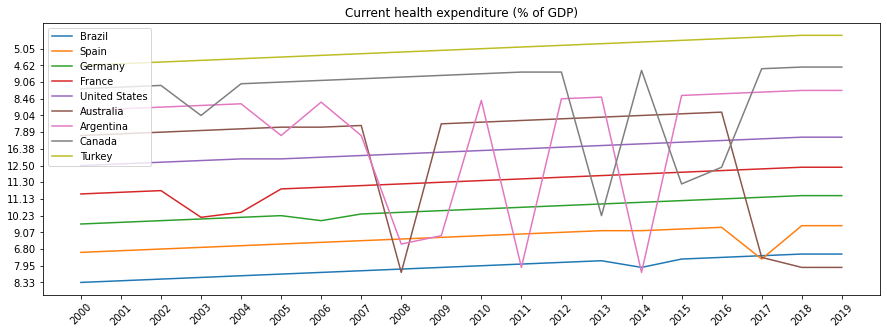

In [27]:
line_plotter('Current health expenditure (% of GDP)')

Countries like Turkey, United States, Germany and Brazil demonstarted steady and slow increase in Current health expenditure, however countiries like Argentina and Canada had fluctuation. We would like also to compare their distribution beahvoir.

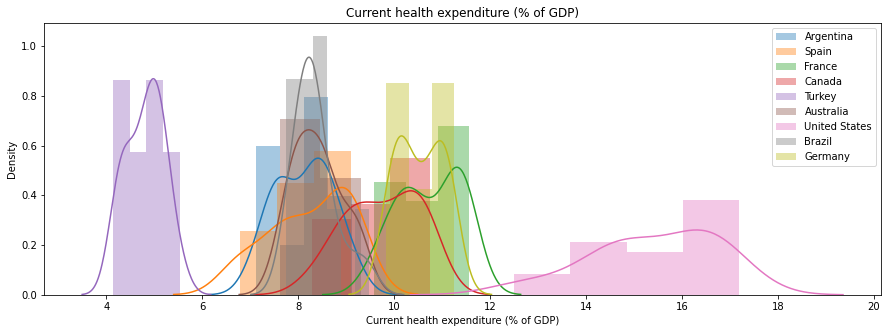

In [28]:
hist_plotter('Current health expenditure (% of GDP)')

From the above histogram we can undestood that countires with wide distribution like United States experienced the large variety or changes during last 20 years from 2000.
Also as much as a county histogram is close to the right side, it spent more portions of its GDP (in %) in health sector. 

# Domestic general government health expenditure (% of current health expenditure)

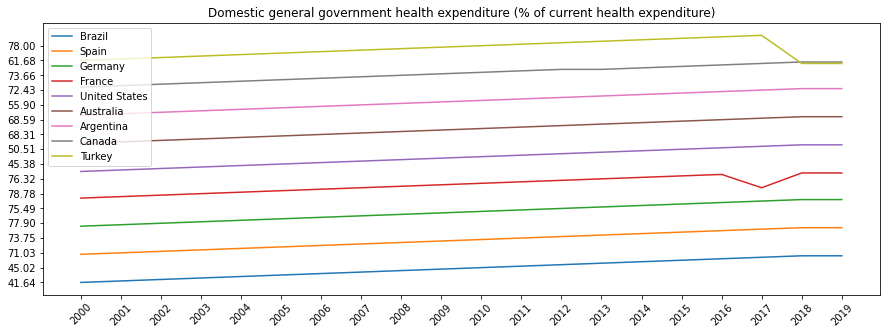

In [29]:
line_plotter('Domestic general government health expenditure (% of current health expenditure)')

For **Domestic general government health expenditure (% of current health expenditure)** all countires showed moderate increase in their health expenditure

# Government expenditure on education, total (% of GDP)

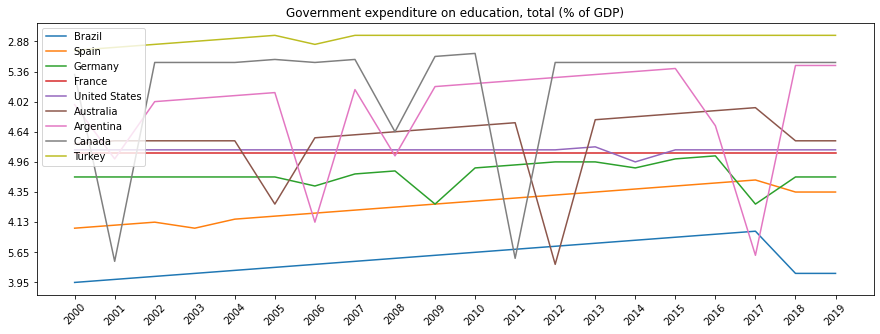

In [30]:
line_plotter('Government expenditure on education, total (% of GDP)')

Here we see that most of the countries experienced fluctuation for their governmental investments in education, however, it seems countires like Turkey and Spain had smooth increase. It was while the France and United States education buddget from GDP (in %) doesn't changed during these years!

# Employers, total (% of total employment) (modeled ILO estimate)

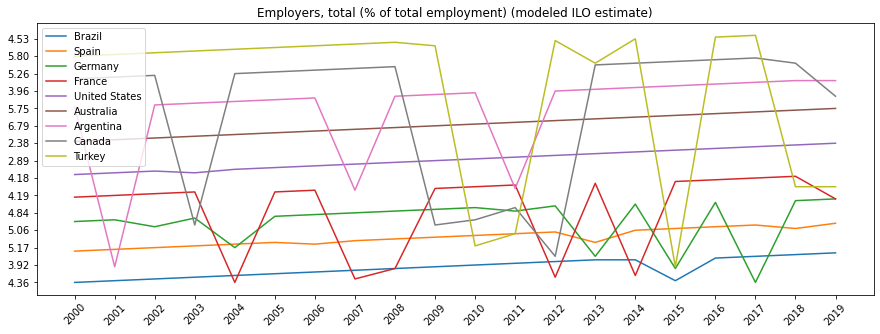

In [31]:
line_plotter('Employers, total (% of total employment) (modeled ILO estimate)')

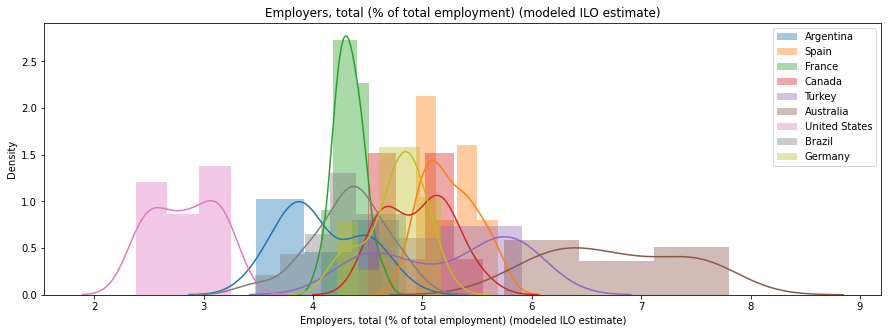

In [32]:
hist_plotter('Employers, total (% of total employment) (modeled ILO estimate)')

Based on these plots, we can see Employment is the main issue for most of the countires and there are not realy stable situation for countires except few ones like US and Argentina.

# Step 4: Ask & answer questions about the data

1.   How employment can effect health expenditure?

In [33]:
def employment_health(country_df,country_name,indicator_list):
  fig=plt.figure(figsize=(15,5))
  ax=fig.add_subplot(111)
  for item in indicator_list:
    ax.plot(country_df.index,country_df['{}'.format(item)],label='{}'.format(item))
  ax.set_yticks(ax.get_yticks()[::10])
  plt.xticks(rotation=45)
  plt.title('{}'.format(country_name))
  plt.legend(loc=2)
  plt.show()

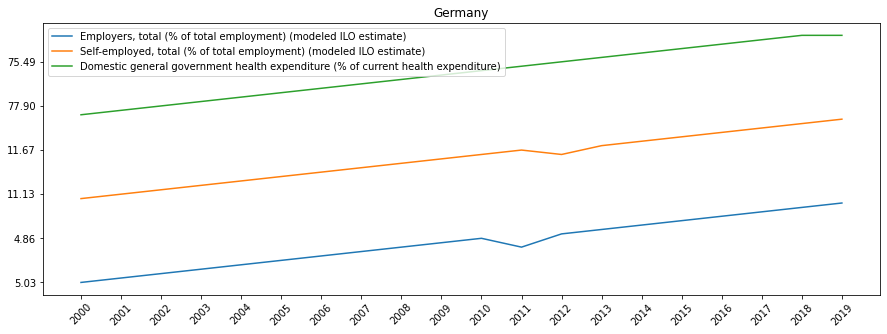

In [34]:
indicator_list = ['Employers, total (% of total employment) (modeled ILO estimate)',
                  'Self-employed, total (% of total employment) (modeled ILO estimate)',
                  'Domestic general government health expenditure (% of current health expenditure)']
employment_health(german_trgt_na_df, 'Germany', indicator_list)

For all countires there were positive correlation between employment(any forms of self-employed or employee) and health expenditures in countries

2.   Evaluate relationship between international investment and employment rate?

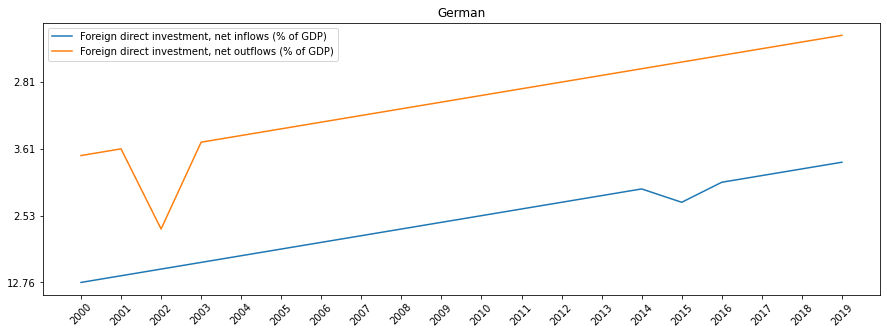

In [35]:
indicator_list = ['Foreign direct investment, net inflows (% of GDP)',
                  'Foreign direct investment, net outflows (% of GDP)',
                  ]
employment_health(german_trgt_na_df, 'German', indicator_list)

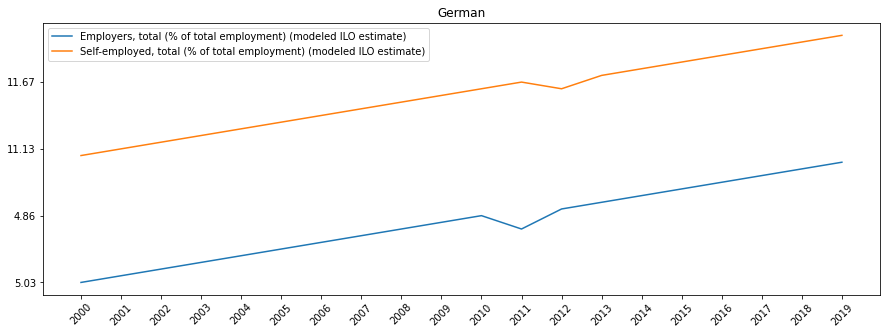

In [36]:
indicator_list = ['Employers, total (% of total employment) (modeled ILO estimate)',
                  'Self-employed, total (% of total employment) (modeled ILO estimate)'
                  ]
employment_health(german_trgt_na_df, 'German', indicator_list)                 

We can see there are positive correlation between foriegn direct investment and employment rate for the case of Germany, which is repeated for the other countries.

3. Does investing in education result in higher employment rate?

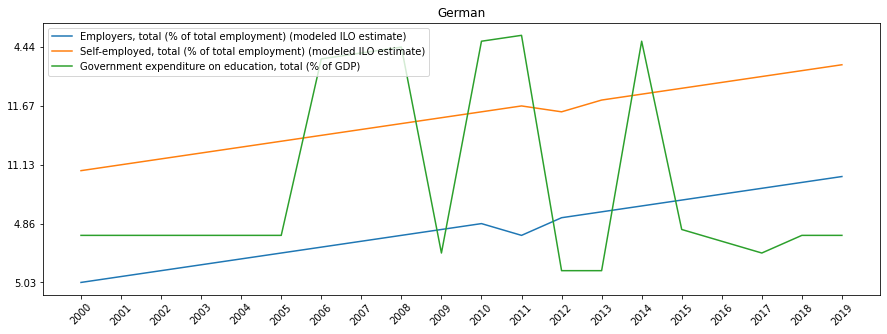

In [37]:
indicator_list = ['Employers, total (% of total employment) (modeled ILO estimate)',
                  'Self-employed, total (% of total employment) (modeled ILO estimate)',
                  'Government expenditure on education, total (% of GDP)'
                  ]
employment_health(german_trgt_na_df, 'German', indicator_list)                 

Here we can see that there is no relationship between government expenditure and employment rates!

# Conclusion

The aim of this analysis was to find any meaningful relationship between development indicators of the countries and people life conditions for some countries during the last 20 years.

Analysis done on several indicators for several countries almost demostrate repeatedly pattern among those countires. 

The possible reasons that may stop us for not visiting any enourmous information relied beneath of data could be:

* the Deep and broaden variety of factors which can affect each others in different shapes and forms. these factors might be study in context of historical, demographical and economical perspective of each country. 
* Moreover, the variety of the indicators from different themes enlighted that it is not possible to analysis whole or tens of data in general forms, and they need to be analysis in specific and targeted reasearch.
* final reason could be the lack of information for most of the countries and indicators for last 60 years. As we saw in the best case there were around 50% of NaN values for the countries/indicators data, which can influence our analysis.

# Resources

https://datatopics.worldbank.org/world-development-indicators/

https://databank.worldbank.org/source/world-development-indicators

https://databank.worldbank.org/home.aspx